In [451]:
#init 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = "../../100pkt/t_parse.txt"

total_line = 600
#num_type = 3
num_type = 6

time = np.loadtxt(f,delimiter=',',usecols=[0],dtype=float)
p_len = np.loadtxt(f,delimiter=',',usecols=[1],dtype=int)
p_type = np.loadtxt(f,delimiter=',',usecols=[2],dtype=str)
mrd_len = np.loadtxt(f,delimiter=',',usecols=[3],dtype=int)

k = 0;
for i in range(total_line):
    if p_type[i] == "MRd":
        k += p_len[i]
print(k);

k = 0;

for i in range(total_line):
    if p_type[i] == "Cpl":
        k += p_len[i]
print(k);

9200
17200


In [452]:
print(time[0])
print(time[total_line-1])

45.309853
45.313968


In [453]:
for i in range(total_line):
    time[i] = int(time[i] * 1000000)
    time[i] = time[i] - 45000000
time

array([309853., 309859., 309860., 309861., 309862., 309863., 309865.,
       309865., 309872., 309879., 309883., 309884., 309936., 309941.,
       309942., 309943., 309944., 309945., 309946., 309947., 309948.,
       309949., 309950., 309951., 309958., 309963., 309975., 309978.,
       309979., 309981., 309982., 309987., 309992., 309997., 310006.,
       310009., 310010., 310011., 310012., 310019., 310020., 310021.,
       310071., 310076., 310077., 310079., 310080., 310081., 310082.,
       310083., 310084., 310085., 310086., 310093., 310100., 310105.,
       310106., 310108., 310109., 310122., 310125., 310126., 310127.,
       310134., 310136., 310182., 310186., 310188., 310189., 310190.,
       310191., 310192., 310193., 310194., 310195., 310196., 310203.,
       310209., 310214., 310218., 310219., 310220., 310221., 310226.,
       310230., 310231., 310244., 310245., 310247., 310252., 310256.,
       310258., 310270., 310276., 310283., 310284., 310286., 310291.,
       310295., 3102

In [454]:
# devide time by time unit
div_unit = 100

unit_time = [];
for i in range(total_line):
        unit_time.append(int(time[i]/div_unit))

In [455]:
# get a count of traffic by time unit

init_time = unit_time[0]
traffic_range = unit_time[total_line-1]%init_time + 1
#traffic_range = unit_time[total_line-1] - init_time
counter = list(range(traffic_range))

for i in range(traffic_range):
    counter[i] = 0;
    
for i in range(total_line):
    counter[unit_time[i]%init_time] += 1;

#for i in range(traffic_range):
 #   print(counter[i]);

In [456]:
cluster = np.ones((traffic_range,num_type),dtype={"names":("ptype","len"),"formats":("str","int")})

In [457]:
for i in range(total_line):
    p_len[i] = p_len[i] - 40;
    if p_len[i] <= 0:
        print("errorrrrr");

In [458]:
start = 0;
offset = 0;
t = 0;

for i in range(traffic_range):
    for k in range(num_type):
        cluster[i][k][1] = 0;

for i in range(traffic_range):
    for k in range(counter[i]):
        offset = k + start;
        
        if p_type[offset] == "MWr":
            if p_len[offset] == 14:
                cluster[i][0][1] += p_len[offset]
            elif p_len[offset] == 10:
                cluster[i][1][1] += p_len[offset]
            else:
                print(offset)
                print("errrrrrrrrrroooooooooooooor!")
        elif p_type[offset] == "MRd":
            #desc
            if mrd_len[offset] == 4:
                cluster[i][2][1] += p_len[offset] 
            #pkt
            elif mrd_len[offset] == 16:
                cluster[i][3][1] += p_len[offset]
            else:
                print("errro");
        elif p_type[offset] == "Cpl":
            #descriptor
            if  p_len[offset] == 22:
                cluster[i][4][1] += p_len[offset]
            #pkt
            else:
                t +=p_len[offset];
                cluster[i][5][1] += p_len[offset]
    start += counter[i]; 
    offset = 0;

t

7000

In [459]:
traffic_range

42

<function matplotlib.pyplot.show(*args, **kw)>

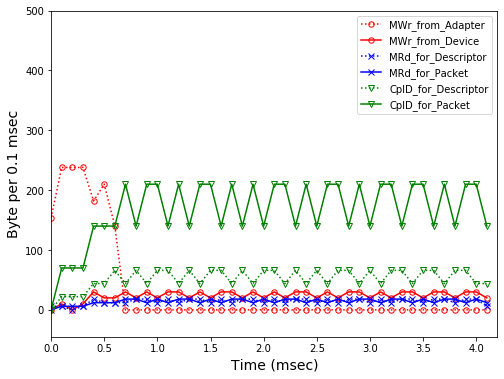

In [480]:
# 4color

import seaborn as sns

# unit based on sec or msec
unit = 10
x_start = 0
x_tol = 1 / unit
x_end = 4.2
#x_end = (unit_time[total_line-1] - unit_time[0])/unit + x_tol*2

x = np.arange(x_start,x_end,x_tol)
a_y_mwr = np.arange(traffic_range)
d_y_mwr = np.arange(traffic_range)
d_y_mrd = np.arange(traffic_range)
d_y_cpid = np.arange(traffic_range)
p_y_mrd = np.arange(traffic_range)
p_y_cpid = np.arange(traffic_range)


#labels = ["MWr","MRd","CpID"]
labels = ["Adapter_MWr","Device_MWr","Descriptor_MRd","Descriptor_CpID","Packet_MRd","Packet_CpID"]

for i in range(traffic_range):
   # y_mwr[i] = cluster[i][0][1]/1024;
    #y_mrd[i] = cluster[i][1][1]/1024; 
    #y_cpid[i] = cluster[i][2][1]/1024;
    a_y_mwr[i] = cluster[i][0][1];
    d_y_mwr[i] = cluster[i][1][1];
    d_y_mrd[i] = cluster[i][2][1]; 
    p_y_mrd[i] = cluster[i][3][1];
    d_y_cpid[i] = cluster[i][4][1]; 
    p_y_cpid[i] = cluster[i][5][1];

pal = sns.color_palette("Set1")
fig, ax = plt.subplots(figsize=(8,6))
#ax.stackplot(x,a_y_mwr,d_y_mwr,d_y_mrd,d_y_cpid,p_y_mrd,p_y_cpid,labels=labels,colors=pal,alpha=0.7)
#ax.plot(x,a_y_mwr,label="MWr_from_Adapter",color="red")
#ax.plot(x,d_y_mwr,label="MWr_from_Device",color="purple")
#ax.plot(x,d_y_mrd,label="MRd_for_Descriptor")
#ax.plot(x,p_y_mrd,label="MRd_for_Packet",color="blue")
#ax.plot(x,d_y_cpid,label="CplD_for_Descriptor")
#ax.plot(x,p_y_cpid,label="CplD_for_Packet",color="green")

ax.plot(x,a_y_mwr,label="MWr_from_Adapter",color="r",linestyle=":",linewidth=1.5,marker="o",markersize=5.4,fillstyle='none')
ax.plot(x,d_y_mwr,label="MWr_from_Device", color='r',linestyle='-',linewidth=1.5,marker="o",markersize=5.4,fillstyle='none')
ax.plot(x,d_y_mrd,label="MRd_for_Descriptor",color="b",linestyle=":",linewidth=1.5,marker="x",markersize=5.4)
ax.plot(x,p_y_mrd,label="MRd_for_Packet", color='b',linestyle="-",linewidth=1.5,marker="x",markersize=5.4)
ax.plot(x,d_y_cpid,label="CplD_for_Descriptor",color="g",linestyle=":",linewidth=1.5,marker="v",markersize=5.4,fillstyle='none')
ax.plot(x,p_y_cpid,label="CplD_for_Packet", color='g',linestyle='-',linewidth=1.5,marker="v",markersize=5.4,fillstyle='none')


ax.set_xlabel("Time (msec)",size=14)
ax.set_ylabel("Byte per 0.1 msec",size=14)
#ax.set_title("Proposed Tx",size=14)
ax.legend(loc="best")
plt.ylim([-45.0,500])
plt.xlim(0.0, 4.2)   

plt.savefig("../../100pkt/t_100pkt.png",dpi=300) 

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

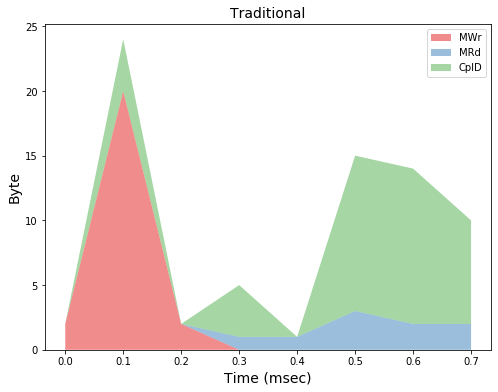

In [305]:
import seaborn as sns

# unit based on sec or msec
unit = 10
x_start = 0
x_tol = 1 / unit
x_end = 0.8
#x_end = (unit_time[total_line-1] - unit_time[0])/unit + x_tol*2

x = np.arange(x_start,x_end,x_tol)
y_mwr = np.arange(traffic_range)
y_mrd = np.arange(traffic_range)
y_cpid = np.arange(traffic_range)

labels = ["MWr","MRd","CpID"]

for i in range(traffic_range):
    y_mwr[i] = cluster[i][0][1];
    y_mrd[i] = cluster[i][1][1]; 
    y_cpid[i] = cluster[i][2][1];

pal = sns.color_palette("Set1")
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(x,y_mwr,y_mrd,y_cpid,labels=labels,colors=pal,alpha=0.5)

ax.set_xlabel("Time (msec)",size=14)
ax.set_ylabel("Byte",size=14)
ax.set_title("Traditional",size=14)
ax.legend(loc="best")
#plt.ylim([0,60])

plt.savefig("./stackg_pic/100pkt/01msec_4col.pdf",dpi=300) 

plt.show